In [5]:
import numpy as np 
import pandas as pd 
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
"""
Use Scikit Learn's cross_val_predict to do a Out-of-Fold Cross validation as opposed 
to averaging out the scores on each fold.
This **usually** tends to be more stable/reliable compared to within fold average.

This script works for all Scikit Learn models as well as the Scikit Learn APIs of
XGBoost, LightGBM and Keras.
"""



# Read Data
print("Reading Dataset...")
train = pd.read_csv("../datasets/oof/train.csv")
target = np.array(train["target"])
target_log = np.log1p(target) # Log transform target as the evaluation metric uses it
xtrain = np.array(train.iloc[:,2:])
print("Shape of training data: {}".format(np.shape(xtrain)))

# Define Model 
xgb_model = XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=70,
                         min_child_weight=100, subsample=1.0, 
                         colsample_bytree=0.8, colsample_bylevel=0.8,
                         random_state=42, n_jobs=4)

# Make OOF predictions using 5 folds
print("Cross Validating...")
oof_preds_log = cross_val_predict(xgb_model, xtrain, target_log, cv=5, 
                                  n_jobs=1, method="predict")
                                  
# Calculate RMSLE (RMSE of Log(1+y))
cv_rmsle = np.sqrt(mean_squared_error(target_log, oof_preds_log))
print("\nOOF RMSLE Score: {:.4f}".format(cv_rmsle))

Reading Dataset...
Shape of training data: (4459, 4991)
Cross Validating...

OOF RMSLE Score: 1.4710


In [2]:
train.shape

(4459, 4993)

In [4]:
train.head(5)

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


(array([2783.,  598.,  401.,  157.,  228.,   74.,   55.,   64.,   39.,
          60.]),
 array([3.0000e+04, 4.0270e+06, 8.0240e+06, 1.2021e+07, 1.6018e+07,
        2.0015e+07, 2.4012e+07, 2.8009e+07, 3.2006e+07, 3.6003e+07,
        4.0000e+07]),
 <a list of 10 Patch objects>)

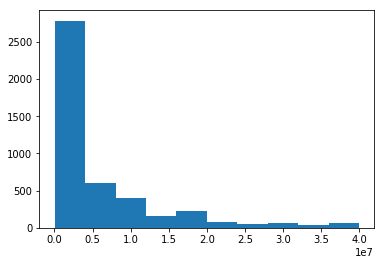

In [7]:
plt.hist(train['target'])

(array([197., 192., 282., 387., 510., 656., 635., 606., 542., 452.]),
 array([10.30898599, 11.0285264 , 11.7480668 , 12.46760721, 13.18714761,
        13.90668802, 14.62622842, 15.34576882, 16.06530923, 16.78484963,
        17.50439004]),
 <a list of 10 Patch objects>)

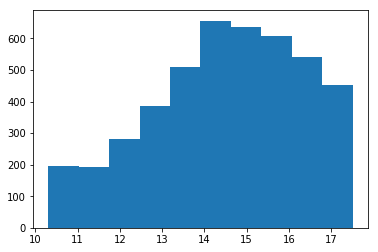

In [8]:
plt.hist(np.log1p(train['target']))

In [9]:
train.iloc[:,2:].head(5)

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


[1]Out-of-Fold (OOF) Model Cross Validation(https://www.kaggle.com/adarshchavakula/out-of-fold-oof-model-cross-validation)